In [2]:
import numpy as np
import os
import sys
import tensorflow as tf

tf.compat.v1.disable_eager_execution()

def reset_graph(seed=42):
    tf.compat.v1.reset_default_graph()
    tf.compat.v1.set_random_seed(seed)
    np.random.seed(seed)

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

\
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [6]:
import keras

(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full.astype(np.float32) / 255
X_test = X_test.astype(np.float32) / 255
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

In [8]:
def rounded_accuracy(y_true, y_pred):
    return keras.metrics.binary_accuracy(tf.round(y_true), tf.round(y_pred))

In [12]:
def plot_image(image):
    plt.imshow(image, cmap="binary")
    plt.axis("off")

In [9]:
tf.random.set_seed(42)
np.random.seed(42)

stacked_encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(100, activation="selu"),
    keras.layers.Dense(30, activation="selu"),
])
stacked_decoder = keras.models.Sequential([
    keras.layers.Dense(100, activation="selu", input_shape=[30]),
    keras.layers.Dense(28 * 28, activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])
stacked_ae = keras.models.Sequential([stacked_encoder, stacked_decoder])
stacked_ae.compile(loss="binary_crossentropy",
                   optimizer=keras.optimizers.SGD(learning_rate=1.5), metrics=[rounded_accuracy])
history = stacked_ae.fit(X_train, X_train, epochs=20,
                         validation_data=(X_valid, X_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/20
54752/55000 [============================>.] - ETA: 0s - loss: 0.3369 - rounded_accuracy: 0.8877

C:\Users\flare\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


55000/55000 [==============================] - 8s 151us/sample - loss: 0.3368 - rounded_accuracy: 0.8878 - val_loss: 0.3111 - val_rounded_accuracy: 0.9113
Epoch 2/20
55000/55000 [==============================] - 6s 114us/sample - loss: 0.3049 - rounded_accuracy: 0.9158 - val_loss: 0.3031 - val_rounded_accuracy: 0.9212
Epoch 3/20
55000/55000 [==============================] - 11s 207us/sample - loss: 0.2977 - rounded_accuracy: 0.9222 - val_loss: 0.2980 - val_rounded_accuracy: 0.9256
Epoch 4/20
55000/55000 [==============================] - 10s 176us/sample - loss: 0.2933 - rounded_accuracy: 0.9265 - val_loss: 0.2933 - val_rounded_accuracy: 0.9300
Epoch 5/20
55000/55000 [==============================] - 9s 160us/sample - loss: 0.2905 - rounded_accuracy: 0.9290 - val_loss: 0.2906 - val_rounded_accuracy: 0.9312
Epoch 6/20
55000/55000 [==============================] - 9s 172us/sample - loss: 0.2886 - rounded_accuracy: 0.9306 - val_loss: 0.2886 - val_rounded_accuracy: 0.9327
Epoch 7/20
55

In [13]:
def show_reconstructions(model, images=X_valid, n_images=5):
    reconstructions = model.predict(images[:n_images])
    fig = plt.figure(figsize=(n_images * 1.5, 3))
    for image_index in range(n_images):
        plt.subplot(2, n_images, 1 + image_index)
        plot_image(images[image_index])
        plt.subplot(2, n_images, 1 + n_images + image_index)
        plot_image(reconstructions[image_index])

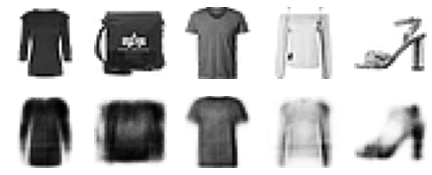

In [15]:
show_reconstructions(stacked_ae)
#save_fig("reconstruction_plot")